In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as plt
import matplotlib.mlab as mlab
import matplotlib   
import matplotlib.pyplot as plt

In [2]:
df_macro = pd.read_csv("macro.csv")
df_test = pd.read_csv("test.csv")
df_sample = pd.read_csv("sample_submission.csv")
df_train = pd.read_csv("train.csv")

df_main = df_train

In [3]:
#First I am going to clean each dataset up and refine them to remove missing values

In [4]:
#work for df_macro
display(df_macro.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   timestamp                                   2484 non-null   object 
 1   oil_urals                                   2484 non-null   float64
 2   gdp_quart                                   2394 non-null   float64
 3   gdp_quart_growth                            2394 non-null   float64
 4   cpi                                         2453 non-null   float64
 5   ppi                                         2453 non-null   float64
 6   gdp_deflator                                2119 non-null   float64
 7   balance_trade                               2453 non-null   float64
 8   balance_trade_growth                        2394 non-null   float64
 9   usdrub                                      2481 non-null   float64
 10  eurrub     

None

#It appears that "df_macro" shows statistics of macroeconomics in the area#

In [5]:
df_macro_numeric = df_macro.select_dtypes(include=[np.number])   
df_macro_numeric_cols = df_macro_numeric.columns.values
print(df_macro_numeric_cols)

['oil_urals' 'gdp_quart' 'gdp_quart_growth' 'cpi' 'ppi' 'gdp_deflator'
 'balance_trade' 'balance_trade_growth' 'usdrub' 'eurrub' 'brent'
 'net_capital_export' 'gdp_annual' 'gdp_annual_growth'
 'average_provision_of_build_contract'
 'average_provision_of_build_contract_moscow' 'rts' 'micex'
 'micex_rgbi_tr' 'micex_cbi_tr' 'deposits_value' 'deposits_growth'
 'deposits_rate' 'mortgage_value' 'mortgage_growth' 'mortgage_rate' 'grp'
 'grp_growth' 'income_per_cap' 'real_dispos_income_per_cap_growth'
 'salary' 'salary_growth' 'fixed_basket' 'retail_trade_turnover'
 'retail_trade_turnover_per_cap' 'retail_trade_turnover_growth'
 'labor_force' 'unemployment' 'employment' 'invest_fixed_capital_per_cap'
 'invest_fixed_assets' 'profitable_enterpr_share'
 'unprofitable_enterpr_share' 'share_own_revenues' 'overdue_wages_per_cap'
 'fin_res_per_cap' 'marriages_per_1000_cap' 'divorce_rate'
 'construction_value' 'invest_fixed_assets_phys' 'pop_natural_increase'
 'pop_migration' 'pop_total_inc' 'childbir

In [6]:
df_macro_non_numeric = df_macro.select_dtypes(exclude=[np.number])
df_macro_non_numeric_cols = df_macro_non_numeric.columns.values
print(df_macro_non_numeric_cols)

['timestamp' 'child_on_acc_pre_school' 'modern_education_share'
 'old_education_build_share']


created missing indicator for: gdp_quart
created missing indicator for: gdp_quart_growth
created missing indicator for: cpi
created missing indicator for: ppi
created missing indicator for: gdp_deflator
created missing indicator for: balance_trade
created missing indicator for: balance_trade_growth
created missing indicator for: usdrub
created missing indicator for: eurrub
created missing indicator for: brent
created missing indicator for: net_capital_export
created missing indicator for: average_provision_of_build_contract_moscow
created missing indicator for: rts
created missing indicator for: micex
created missing indicator for: micex_rgbi_tr
created missing indicator for: micex_cbi_tr
created missing indicator for: deposits_growth
created missing indicator for: deposits_rate
created missing indicator for: mortgage_growth
created missing indicator for: grp
created missing indicator for: grp_growth
created missing indicator for: income_per_cap
created missing indicator for: real_disp

<AxesSubplot:xlabel='index'>

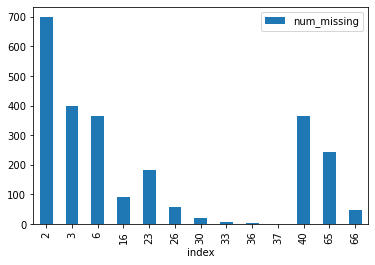

In [7]:
#df_macro figure 1 - Missing Data
for col in df_macro.columns:
    missing = df_macro[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_macro['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df_macro.columns if 'ismissing' in col]
df_macro['num_missing'] = df_macro[ismissing_cols].sum(axis=1)

df_macro['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [8]:
#df_macro figure 2 - Missing Data
for col in df_macro.columns:
    pct_missing = np.mean(df_macro[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

timestamp - 0%
oil_urals - 0%
gdp_quart - 4%
gdp_quart_growth - 4%
cpi - 1%
ppi - 1%
gdp_deflator - 15%
balance_trade - 1%
balance_trade_growth - 4%
usdrub - 0%
eurrub - 0%
brent - 0%
net_capital_export - 16%
gdp_annual - 0%
gdp_annual_growth - 0%
average_provision_of_build_contract - 0%
average_provision_of_build_contract_moscow - 15%
rts - 0%
micex - 0%
micex_rgbi_tr - 0%
micex_cbi_tr - 0%
deposits_value - 0%
deposits_growth - 1%
deposits_rate - 17%
mortgage_value - 0%
mortgage_growth - 15%
mortgage_rate - 0%
grp - 26%
grp_growth - 41%
income_per_cap - 12%
real_dispos_income_per_cap_growth - 26%
salary - 12%
salary_growth - 26%
fixed_basket - 0%
retail_trade_turnover - 12%
retail_trade_turnover_per_cap - 12%
retail_trade_turnover_growth - 12%
labor_force - 12%
unemployment - 12%
employment - 12%
invest_fixed_capital_per_cap - 12%
invest_fixed_assets - 12%
profitable_enterpr_share - 26%
unprofitable_enterpr_share - 26%
share_own_revenues - 26%
overdue_wages_per_cap - 26%
fin_res_per_c

<AxesSubplot:>

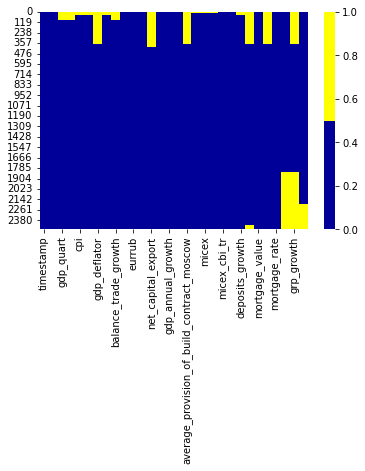

In [9]:
#df_macro figure 3 - Missing Data
cols = df_macro.columns[:30] 
colours = ['#000099', '#ffff00'] #Yellow=Missing #Blue=Present
sns.heatmap(df_macro[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
#Original
df_macro

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,turnover_catering_per_cap_ismissing,theaters_viewers_per_1000_cap_ismissing,seats_theather_rfmin_per_100000_cap_ismissing,museum_visitis_per_100_cap_ismissing,bandwidth_sports_ismissing,population_reg_sports_share_ismissing,students_reg_sports_share_ismissing,apartment_build_ismissing,apartment_fund_sqm_ismissing,num_missing
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,37
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,False,False,False,False,True,True,False,False,True,33
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,False,False,False,False,True,True,False,False,True,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,True,True,True,True,True,True,True,True,True,66
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,True,True,True,True,True,True,True,True,True,66


In [11]:
#Work for df_test
display(df_test.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 291 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                float64
 3    life_sq                                float64
 4    floor                                  int64  
 5    max_floor                              int64  
 6    material                               int64  
 7    build_year                             float64
 8    num_room                               int64  
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                           

None

#"df_test" appears to show information on individual properties along with information of surrounding neighbourhoods

In [12]:
df_test_numeric = df_test.select_dtypes(include=[np.number])   
df_test_numeric_cols = df_test_numeric.columns.values
print(df_test_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [13]:
df_test_non_numeric = df_test.select_dtypes(exclude=[np.number])
df_test_non_numeric_cols = df_test_non_numeric.columns.values
print(df_test_non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


created missing indicator for: life_sq
created missing indicator for: build_year
created missing indicator for: state
created missing indicator for: product_type
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raion_build_count_with_builddate_info
created missing indicator for: build_count_before_1920
created missing indicator for: build_count_1921-1945
created miss

<AxesSubplot:xlabel='index'>

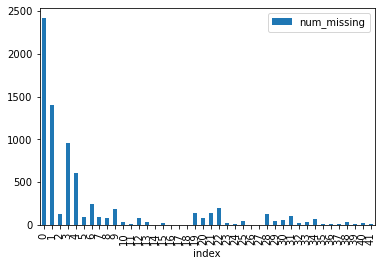

In [14]:
#df_test figure 1 - Missing Data
for col in df_test.columns:
    missing = df_test[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_test['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df_test.columns if 'ismissing' in col]
df_test['num_missing'] = df_test[ismissing_cols].sum(axis=1)

df_test['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [15]:
#df_test figure 2 - Missing Data
for col in df_test.columns:
    pct_missing = np.mean(df_test[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 15%
floor - 0%
max_floor - 0%
material - 0%
build_year - 14%
num_room - 0%
kitch_sq - 0%
state - 9%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 21%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 21%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 45%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0%
wor

<AxesSubplot:>

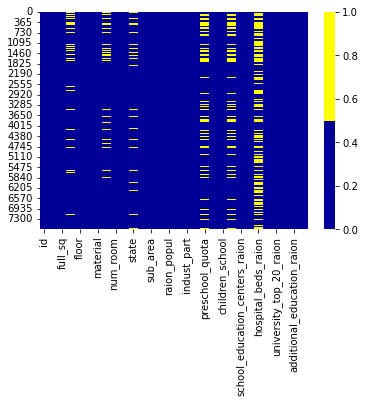

In [16]:
#df_test figure 3 - Missing Data
cols = df_test.columns[:30]
colours = ['#000099', '#ffff00'] #Yellow=Missing #Blue=Present
sns.heatmap(df_test[cols].isnull(), cmap=sns.color_palette(colours))

In [17]:
#Original
df_test

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,False,False,False,False,False,False,False,False,False,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,False,False,False,False,False,False,False,False,False,23
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,False,False,False,False,False,False,False,False,False,0
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,False,False,False,False,False,False,False,False,False,19
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,False,False,False,False,False,False,False,False,False,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,False,False,False,False,False,False,False,False,False,0
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,False,False,False,False,False,False,False,False,False,22
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,False,False,False,False,False,False,False,False,False,0
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,False,False,False,False,False,False,False,False,False,1


In [18]:
#work for df_sample
display(df_sample.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         7662 non-null   int64  
 1   price_doc  7662 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 119.8 KB


None

#"df_sample" appears to show id and price information on individual apartments

In [19]:
df_sample_numeric = df_sample.select_dtypes(include=[np.number])   
df_sample_numeric_cols = df_sample_numeric.columns.values
print(df_sample_numeric_cols)

['id' 'price_doc']


In [20]:
df_sample_non_numeric = df_sample.select_dtypes(exclude=[np.number])
df_sample_non_numeric_cols = df_sample_non_numeric.columns.values
print(df_sample_non_numeric_cols)

[]


In [21]:
#df_sample Figure 1 - This figure is more than suffice to show that there is no missing data within this dataframe, no need to refine this as it is 100% in tack
for col in df_sample.columns:
    pct_missing = np.mean(df_sample[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
price_doc - 0%


In [22]:
#Work for df_train #This was the dataframe I used for my client
display(df_train.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

None

#"df_train" appears to be very similar with 'df_test", in the sense that it describes information on individual properties along with information of surrounding neighbourhoods.

In [23]:
df_train_numeric = df_train.select_dtypes(include=[np.number])   
df_train_numeric_cols = df_train_numeric.columns.values
print(df_train_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [24]:
df_train_non_numeric = df_train.select_dtypes(exclude=[np.number])
df_train_non_numeric_cols = df_train_non_numeric.columns.values
print(df_train_non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

<AxesSubplot:xlabel='index'>

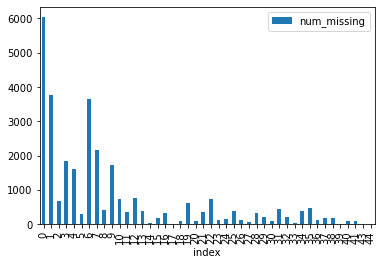

In [25]:
#df_train figure 1 - Missing Data
for col in df_train.columns:
    missing = df_train[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_train['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df_train.columns if 'ismissing' in col]
df_train['num_missing'] = df_train[ismissing_cols].sum(axis=1)

df_train['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [26]:
#df_train figure 2 - Missing Data
for col in df_train.columns:
    pct_missing = np.mean(df_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

<AxesSubplot:>

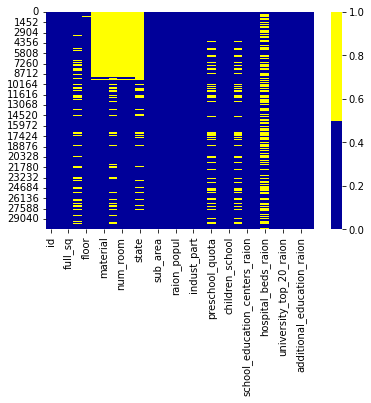

In [27]:
#df_train figure 3 - Missing Data
cols = df_train.columns[:30] 
colours = ['#000099', '#ffff00'] #Yellow=Missing #Blue=Present
sns.heatmap(df_train[cols].isnull(), cmap=sns.color_palette(colours))

In [28]:
#Moving on, I will begin to analyze df_train for the customer who is wanting to move into a residential apartment

In [29]:
#First I will create a dataframe that contains points of interest to my client 
df_main_info = df_main [['price_doc','full_sq','life_sq','kitch_sq','max_floor']]

In [30]:
df_main_info

,price_doc,full_sq,life_sq,kitch_sq,max_floor
0,5850000,43,27.0,NaN,NaN
1,6000000,34,19.0,NaN,NaN
2,5700000,43,29.0,NaN,NaN
3,13100000,89,50.0,NaN,NaN
4,16331452,77,77.0,NaN,NaN
...,...,...,...,...,...
30466,7400000,44,27.0,6.0,9.0
30467,25000000,86,59.0,10.0,9.0
30468,6970959,45,NaN,1.0,20.0
30469,13500000,64,32.0,11.0,15.0


In [31]:
df_main_info.describe()

,price_doc,full_sq,life_sq,kitch_sq,max_floor
count,3.047100e+04,30471.000000,24088.000000,20899.000000,20899.000000
mean,7.123035e+06,54.214269,34.403271,6.399301,12.558974
std,4.780111e+06,38.031487,52.285733,28.265979,6.756550
min,1.000000e+05,0.000000,0.000000,0.000000,0.000000
25%,4.740002e+06,38.000000,20.000000,1.000000,9.000000
50%,6.274411e+06,49.000000,30.000000,6.000000,12.000000
75%,8.300000e+06,63.000000,43.000000,9.000000,17.000000
max,1.111111e+08,5326.000000,7478.000000,2014.000000,117.000000


In [32]:
df_main_amenities = df_main [['sport_count_5000','market_count_5000','leisure_count_5000','green_part_5000','cafe_count_5000_na_price']]

In [33]:
df_main_amenities

,sport_count_5000,market_count_5000,leisure_count_5000,green_part_5000,cafe_count_5000_na_price
0,52,4,0,13.09,12
1,66,14,10,10.26,9
2,67,10,4,13.69,10
3,26,3,0,14.18,4
4,195,14,91,8.38,143
...,...,...,...,...,...
30466,84,6,2,15.52,18
30467,171,15,82,8.29,136
30468,11,1,1,35.62,1
30469,65,7,4,30.36,11


In [34]:
df_main_amenities.describe()

,sport_count_5000,market_count_5000,leisure_count_5000,green_part_5000,cafe_count_5000_na_price
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,52.796593,5.987070,8.648814,22.769557,17.806898
std,46.292660,4.889219,20.580741,11.208471,33.269057
min,0.000000,0.000000,0.000000,3.520000,0.000000
25%,11.000000,1.000000,0.000000,14.780000,1.000000
50%,48.000000,5.000000,2.000000,19.760000,8.000000
75%,76.000000,10.000000,7.000000,31.405000,15.000000
max,218.000000,21.000000,106.000000,75.460000,174.000000


In [35]:
df_main_both = pd.concat([df_main_info, df_main_amenities], axis=1)

In [36]:
df_main_both #Both df's combined into 1, I primary still used them seperate just to note which is apartment stats and aminities stats

,price_doc,full_sq,life_sq,kitch_sq,max_floor,sport_count_5000,market_count_5000,leisure_count_5000,green_part_5000,cafe_count_5000_na_price
0,5850000,43,27.0,NaN,NaN,52,4,0,13.09,12
1,6000000,34,19.0,NaN,NaN,66,14,10,10.26,9
2,5700000,43,29.0,NaN,NaN,67,10,4,13.69,10
3,13100000,89,50.0,NaN,NaN,26,3,0,14.18,4
4,16331452,77,77.0,NaN,NaN,195,14,91,8.38,143
...,...,...,...,...,...,...,...,...,...,...
30466,7400000,44,27.0,6.0,9.0,84,6,2,15.52,18
30467,25000000,86,59.0,10.0,9.0,171,15,82,8.29,136
30468,6970959,45,NaN,1.0,20.0,11,1,1,35.62,1
30469,13500000,64,32.0,11.0,15.0,65,7,4,30.36,11


In [48]:
df_main_both.describe()

,price_doc,full_sq,life_sq,kitch_sq,max_floor,sport_count_5000,market_count_5000,leisure_count_5000,green_part_5000,cafe_count_5000_na_price
count,3.047100e+04,30471.000000,24088.000000,20899.000000,20899.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,7.123035e+06,54.214269,34.403271,6.399301,12.558974,52.796593,5.987070,8.648814,22.769557,17.806898
std,4.780111e+06,38.031487,52.285733,28.265979,6.756550,46.292660,4.889219,20.580741,11.208471,33.269057
min,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.520000,0.000000
25%,4.740002e+06,38.000000,20.000000,1.000000,9.000000,11.000000,1.000000,0.000000,14.780000,1.000000
50%,6.274411e+06,49.000000,30.000000,6.000000,12.000000,48.000000,5.000000,2.000000,19.760000,8.000000
75%,8.300000e+06,63.000000,43.000000,9.000000,17.000000,76.000000,10.000000,7.000000,31.405000,15.000000
max,1.111111e+08,5326.000000,7478.000000,2014.000000,117.000000,218.000000,21.000000,106.000000,75.460000,174.000000


In [37]:
#determining how many apartments out of the total contain more than 15 apartments in a 5000m radius
df_main_amenities[(df_main_amenities.sport_count_5000 >= 15)]

,sport_count_5000,market_count_5000,leisure_count_5000,green_part_5000,cafe_count_5000_na_price
0,52,4,0,13.09,12
1,66,14,10,10.26,9
2,67,10,4,13.69,10
3,26,3,0,14.18,4
4,195,14,91,8.38,143
...,...,...,...,...,...
30465,203,13,105,6.80,170
30466,84,6,2,15.52,18
30467,171,15,82,8.29,136
30469,65,7,4,30.36,11


21542 of the total 30471 contain more than 15 sport facilities in a 5000m radius, or in other terms roughly 70% of the apartments meet his demands. 

In [38]:
#Figures

Text(0.5, 1.0, 'Price of Apartment vs Full Square Meters with Best fit line')

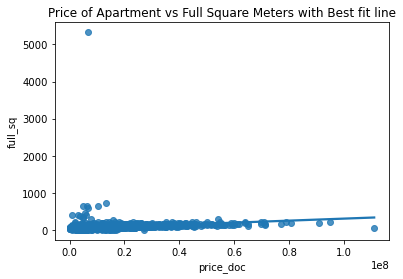

In [41]:
sns.regplot(x='price_doc', y='full_sq', data=df_main_info)
plt.title("Price of Apartment vs Full Square Meters with Best fit line")

C:\Users\Diljit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sports Facilities')

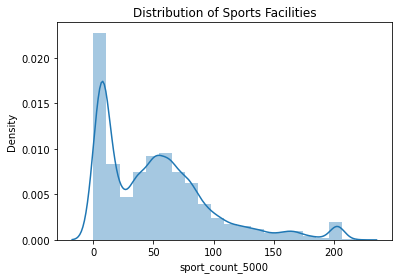

In [51]:
sns.distplot(a=df_main_amenities.sport_count_5000, bins=20)
plt.title("Distribution of Sports Facilities")

C:\Users\Diljit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Markets')

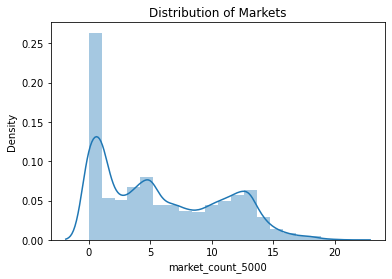

In [50]:
sns.distplot(a=df_main_amenities.market_count_5000, bins=20)
plt.title("Distribution of Markets")

C:\Users\Diljit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Leisure Activities')

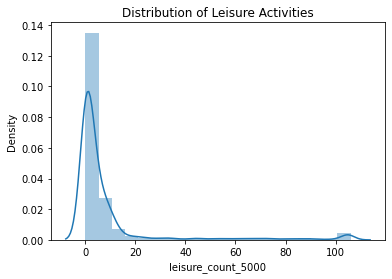

In [53]:
sns.distplot(a=df_main_amenities.leisure_count_5000, bins=20)
plt.title("Distribution of Leisure Activities")

C:\Users\Diljit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Green Zones')

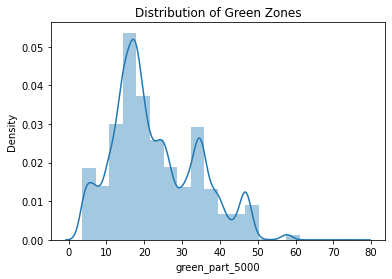

In [54]:
sns.distplot(a=df_main_amenities.green_part_5000, bins=20)
plt.title("Distribution of Green Zones")

C:\Users\Diljit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Cafes')

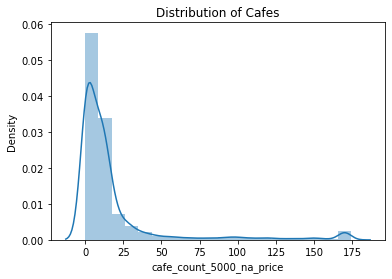

In [55]:
sns.distplot(a=df_main_amenities.cafe_count_5000_na_price, bins=20)
plt.title("Distribution of Cafes")

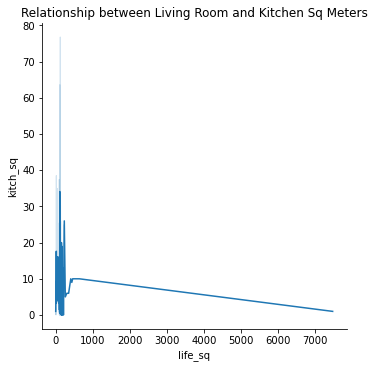

In [47]:
sns.relplot(x='life_sq', y='kitch_sq', data=df_main_info,kind='line')
plt.title("Relationship between Living Room and Kitchen Sq Meters")
plt.show()